# Salary Prediction Using Machine Learning


## 1. Project Overview
### This project aims to predict employee salary using machine learning regression algorithms based on features such as age, education, experience, job level, and working hours.


## 2. Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 3. Load the Dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               5000 non-null   int64  
 1   Education_Years   5000 non-null   int64  
 2   Experience_Years  5000 non-null   int64  
 3   Job_Level         5000 non-null   int64  
 4   Hours_Per_Week    5000 non-null   int64  
 5   Salary            5000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


## 4. Exploratory Data Analysis (EDA)


### 4.1 Dataset Information


In [2]:
df=pd.read_csv(r"C:\Users\Amit Gupta\Downloads\salary_prediction.csv")
df.head()

,Age,Education_Years,Experience_Years,Job_Level,Hours_Per_Week,Salary
0,59,16,37,2,54,135167.27
1,49,15,28,1,50,102491.69
2,35,10,19,4,55,94273.72
3,28,16,6,1,60,75428.11
4,41,16,19,4,56,115861.58


### 4.2 Statistical Summary


In [4]:
df.describe()

,Age,Education_Years,Experience_Years,Job_Level,Hours_Per_Week,Salary
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.194600,15.003400,19.271800,3.032000,47.541400,109045.196922
std,11.210025,3.188953,11.525784,1.416255,7.447723,17773.531005
min,21.000000,10.000000,0.000000,1.000000,35.000000,58131.510000
25%,31.000000,12.000000,9.000000,2.000000,41.000000,95846.630000
50%,40.000000,15.000000,19.000000,3.000000,48.000000,109219.555000
75%,50.000000,18.000000,29.000000,4.000000,54.000000,122132.682500
max,59.000000,20.000000,43.000000,5.000000,60.000000,158693.340000


## 5. Correlation Analysis


### 5.1 Correlation Matrix


In [40]:
numeric_cols = df.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

                       Age  Education_Years  Experience_Years  Job_Level  \
Age               1.000000        -0.004836          0.962619  -0.011694   
Education_Years  -0.004836         1.000000         -0.272689  -0.003922   
Experience_Years  0.962619        -0.272689          1.000000  -0.009638   
Job_Level        -0.011694        -0.003922         -0.009638   1.000000   
Hours_Per_Week    0.001596         0.017871         -0.004334   0.007783   
Salary            0.740735         0.234957          0.650388   0.546665   

                  Hours_Per_Week    Salary  
Age                     0.001596  0.740735  
Education_Years         0.017871  0.234957  
Experience_Years       -0.004334  0.650388  
Job_Level               0.007783  0.546665  
Hours_Per_Week          1.000000  0.068306  
Salary                  0.068306  1.000000  


### 5.2 Correlation Heatmap


<Axes: >

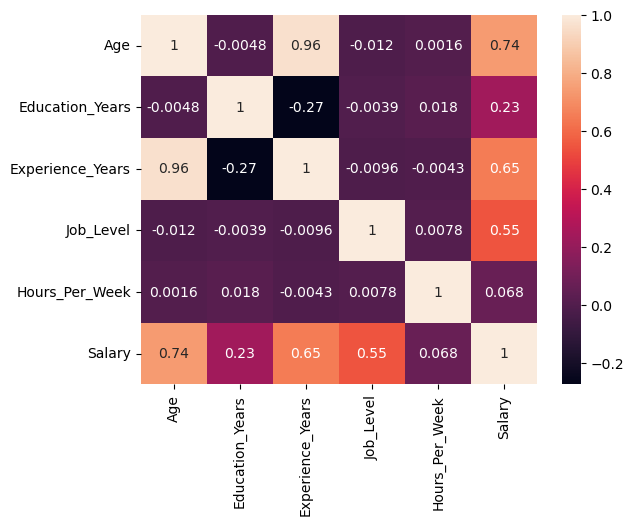

In [41]:
sns.heatmap(correlation_matrix,annot=True )

## 6. Outlier Detection

### 6.1 Boxplot Visualization


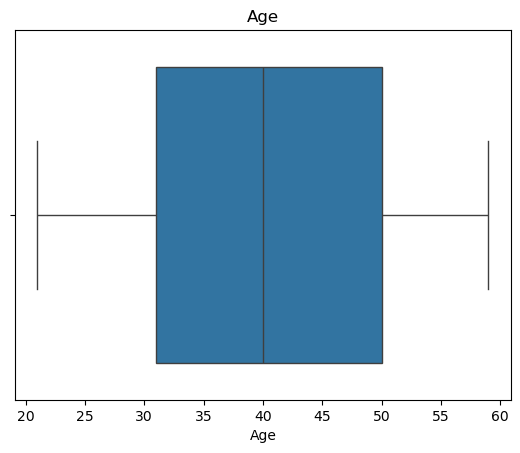

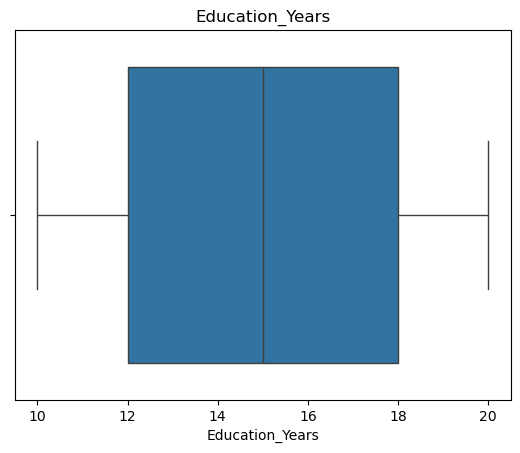

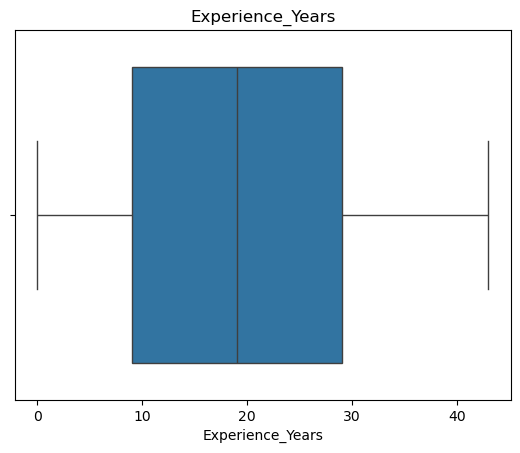

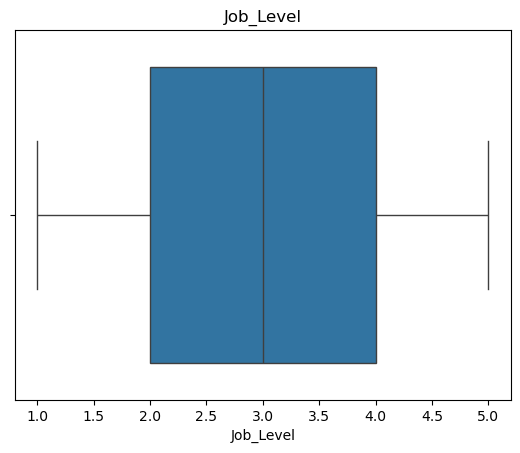

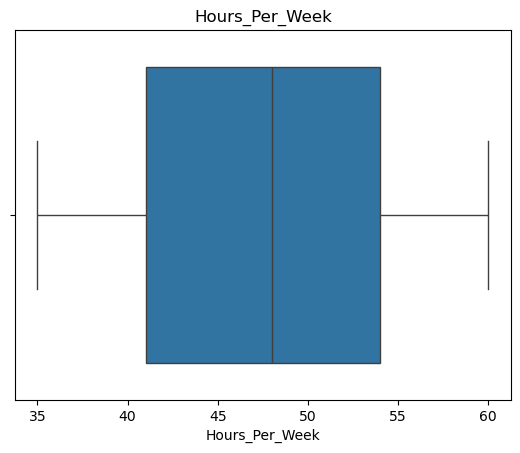

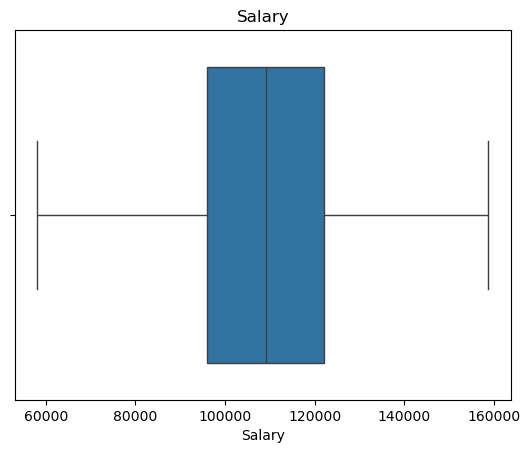

In [6]:
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


## 7. Feature and Target Selection


### In this step, input features and the target variable are defined for model training.


In [8]:
X=df.drop(columns=["Salary"])
y=df["Salary"]

In [9]:
X

,Age,Education_Years,Experience_Years,Job_Level,Hours_Per_Week
0,59,16,37,2,54
1,49,15,28,1,50
2,35,10,19,4,55
3,28,16,6,1,60
4,41,16,19,4,56
...,...,...,...,...,...
4995,36,18,12,2,36
4996,25,11,8,2,36
4997,24,18,0,3,55
4998,41,13,22,2,57


In [10]:
y

0       135167.27
1       102491.69
2        94273.72
3        75428.11
4       115861.58
          ...    
4995     96849.40
4996     84862.03
4997     97607.71
4998    103622.68
4999    115142.16
Name: Salary, Length: 5000, dtype: float64

### importing Required liabires

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


## 8. Train-Test Split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 9. Feature Scaling


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit ONLY on train
X_test_scaled = scaler.transform(X_test)         # transform test


## 10. Model Training and Evaluation


### 10.1 Linear Regression


In [14]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test_scaled)


In [16]:
from sklearn.metrics import r2_score

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.9162902104015396


In [19]:
model.score(X_train_scaled, y_train)


0.9199042281298264

### 10.2 Ridge Regression


In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)
print("Ridge Regression R2:", r2_score(y_test, y_pred))


Ridge Regression R2: 0.9162503657289689


### 10.3 Lasso Regression


In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
print("Lasso Regression R2:", r2_score(y_test, y_pred))


Lasso Regression R2: 0.916212818101905


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+10, tolerance: 1.268e+08
  model = cd_fast.enet_coordinate_descent(


### 10.4 K-Nearest Neighbors Regression


In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print("KNN R2:", r2_score(y_test, y_pred))


KNN R2: 0.8945267706865472


### 10.5 Support Vector Regression (SVR)


In [23]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)
print("SVR R2:", r2_score(y_test, y_pred))


SVR R2: 0.0316118799762668


### 10.6 Decision Tree Regression


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, y_pred))


Decision Tree R2: 0.8287754787511509


### 10.7 Random Forest Regression


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred))


Random Forest R2: 0.8949374083254197


### 10.8 Gradient Boosting Regression


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print("Gradient Boosting R2:", r2_score(y_test, y_pred))


Gradient Boosting R2: 0.9129152502788692


## Conclusion

### Multiple regression algorithms were evaluated for salary prediction. Linear, Ridge, and Lasso Regression achieved the highest R² scores (≈0.916), indicating that the relationship between features and salary is predominantly linear. Ridge and Lasso regression performed similarly to Linear Regression, suggesting that multicollinearity had minimal impact on model performance.

### Tree-based and ensemble models such as Random Forest and Gradient Boosting also performed well but did not surpass linear models. Support Vector Regression showed significantly poor performance due to its sensitivity to hyperparameters and target scaling.

### Overall, Linear Regression was selected as the final model due to its high accuracy, simplicity, and interpretability.
